#Assignment 1 (Project Phase 1)

##Group Name: **Data Dreamers**

- Dataset: Road Traffic Accident Dataset, Rawalpindi-Punjab, Pakistan
- Two possible targets- ***Injury Type*** or ***Patient Status***


# Imports

In [ ]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.impute import SimpleImputer
import seaborn as sns

## Data Import

In [ ]:
df = pd.read_csv('/content/RTA Data 2020 to July 2023.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/RTA Data 2020 to July 2023.csv'

In [ ]:
df.shape

## Data first 5 rows

In [ ]:
df.head(5)

#Selecting Our Target Variable

- For this assignment, we have selected **Injury Type** as the target variable.



In [ ]:
# Missing values
df.isnull().sum()

In [ ]:
df['PatientStatus'].value_counts()

In [ ]:
df['InjuryType'].value_counts()

#Droping Features



In [ ]:
df['EcNumber'].value_counts()


In [ ]:
df['HospitalName'].value_counts()

In [ ]:
df['PatientStatus'].value_counts()

In [ ]:
df['CallTime'].value_counts()

In [ ]:
df['InjuryType'].value_counts()

##Info

` EcNumber, HospitalName, TotalPatientsInEmergency, PatientStatus and CallTime were removed as they do not exhibit any significant correlation with the target variable.`



###Doubt

`I have a doubt regarding the correlation between the TotalPatientsInEmergency and the target value. So I investigate this:`

In [ ]:
df['TotalPatientsInEmergency'].value_counts()

In [ ]:
#drop 'Alive & unstable' row from TotalPatientsInEmergency
# df = df[df['TotalPatientsInEmergency'] != 'Alive & unstable']

In [ ]:
df['TotalPatientsInEmergency'].value_counts()

In [ ]:



data = pd.read_csv('/content/RTA Data 2020 to July 2023.csv')
data = data[data['TotalPatientsInEmergency'] != 'Alive & unstable']
label_encoder = LabelEncoder()
data['InjuryType_encoded'] = label_encoder.fit_transform(data['InjuryType'])
correlation = data[['TotalPatientsInEmergency', 'InjuryType_encoded']].corr()

correlation


###Doubt Output
`Based on the output, the correlation between TotalPatientsInEmergency and InjuryType is extremely low, at -0.004561. This indicates that there is virtually no linear relationship between the number of patients in an emergency and the type of injury.`

In [ ]:
df = df.drop(['EcNumber', 'HospitalName', 'TotalPatientsInEmergency','PatientStatus', 'CallTime'], axis=1)

In [ ]:
df.info()

#Filling the Missing Values


In [ ]:
# df.duplicated().sum()

In [ ]:
# df.drop_duplicates(inplace =True)

In [ ]:
# df.shape

In [ ]:
#missing values
df.isnull().sum()

##Handling Missing Values
`While several columns contain missing values, the number of missing entries is relatively low, with a maximum of 5 missing values in the **responseTime** column. Given the small number of missing values, it is not a significant issue. To address this, we can apply a forward fill technique, which propagates the last valid observation to the next missing one. In this case, we have opted for the forward fill method to handle the missing values efficiently.`

In [ ]:
forwardfill = [
    'Reason', 'responsetime', 'EducationTitle', 'InjuryType', 'Cause',
    'BicycleInvovled', 'BikesInvolved', 'BusesInvolved', 'CarsInvolved',
    'CartInvovled', 'RickshawsInvolved', 'TractorInvovled', 'TrainsInvovled',
    'TrucksInvolved', 'VansInvolved', 'OthersInvolved', 'Age','Gender'
]


df[forwardfill] = df[forwardfill].fillna(method='ffill')


df.isnull().sum()

In [ ]:
df[df.duplicated()]

In [ ]:
df.duplicated().sum()

#Encoding the categorical columns

In [ ]:
df.drop_duplicates(inplace =True)

In [ ]:
 df.shape

In [ ]:
df.info()

##Data Type Conversion
Upon reviewing the data types in the dataframe, we observe that the following columns are of object type:

* EcYear
* EmergencyArea
* Gender
* Reason
* EducationTitle
* InjuryType
* Cause
* PatientStatus

Since machine learning models require numerical data, these categorical columns must be transformed into numerical format through encoding techniques. We will apply appropriate encoding methods to convert these columns into numerical values, making them suitable for analysis and modeling.

## Ordinal Encoding

In [ ]:
df['EcYear'].value_counts()


In [ ]:
df['EducationTitle'].value_counts()

###Info

```
For the columns EcYear and EducationTitle, we will apply Ordinal Encoding,
because these features have a strong inherent order:

- EcYear follows a natural chronological sequence, where earlier years are logically ordered before later years.
- EducationTitle represents educational level that follows a defined hierarchy (PhD < Master < Primary < Matric).
By using ordinal encoding, we can capture the meaningful order in these features.
```



###EcYear Encoding

In [ ]:
# Ordinal Encoding for EcYear
from sklearn.preprocessing import OrdinalEncoder
df['EcYear'] = df['EcYear'].astype(str)
df['EducationTitle'] = df['EducationTitle'].astype(str)
encoder = OrdinalEncoder()
df['EcYear'] = encoder.fit_transform(df[['EcYear']])

df.info()

###EcYear Visualization Boxplot

In [ ]:
#boxplot for column EcYear
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['EcYear'])
plt.title('Boxplot of EcYear')
plt.show()

In [ ]:
Q1 = df['EcYear'].quantile(0.25)
Q3 = df['EcYear'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

outliers = df[(df['EcYear'] < lower_bound) | (df['EcYear'] > upper_bound)]
outliers

In [ ]:
df = df[(df['EcYear'] >= lower_bound) & (df['EcYear'] <= upper_bound)]
df.shape

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['EcYear'])

###EducationTitle Visualization Bar chart

In [ ]:

df['EducationTitle'].value_counts().plot(kind='bar', color=['blue', 'red'])


plt.show()

###EducationTitle encoding

In [ ]:
df['EducationTitle'] = encoder.fit_transform(df[['EducationTitle']])
df.info()

In [ ]:
df['EducationTitle'].plot(kind='hist', color=['blue'])


plt.show()

###EducationTitle Visualization Box plot

In [ ]:
#boxplot for column EducationTitle
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['EducationTitle'])

plt.show()

In [ ]:

Q1 = df['EducationTitle'].quantile(0.25)
Q3 = df['EducationTitle'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

outliers = df[(df['EducationTitle'] < lower_bound) | (df['EducationTitle'] > upper_bound)]
outliers

##Frequency Encoding

In [ ]:
df['EmergencyArea'].head(2)

In [ ]:
df['EmergencyArea'].value_counts()

###Info

```
The EmergencyArea column contains many categories, and the frequency of each category can provide valuable
information. For example, if a patient was injured at "Railway Track Underpass Nazar Chowk Near Kacheri"
(which has a frequency of 42), they may be more likely to have severe injuries compared to a patient injured
at "Abid Majeed Road Front of CSD Rwp" (which has a frequency of 1).

Given this, we will apply Frequency Encoding to the EmergencyArea column. This encoding technique will replace
each unique location with the count of its occurrences in the dataset. This method allows us to incorporate the
importance of location frequency into the model, which can potentially reveal patterns related to injury type.
```



###EmergencyArea Frequency *Encoding*

In [ ]:
frequency_encoding = df['EmergencyArea'].value_counts().to_dict()
df['EmergencyArea'] = df['EmergencyArea'].map(frequency_encoding)
df.info()

In [ ]:
df['EmergencyArea'].value_counts()

###EmergencyArea Visualization Box Plot

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['EmergencyArea'])

plt.show()


In [ ]:
Q1 = df['EmergencyArea'].quantile(0.25)
Q3 = df['EmergencyArea'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

outliers = df[(df['EmergencyArea'] < lower_bound) | (df['EmergencyArea'] > upper_bound)]
outliers

NameError: name 'df' is not defined

###info




```
For the Cause column, we can analyze the frequency of different causes
of injuries to capture their potential impact. For instance, if the cause of injury is "Over Speeding" (with a frequency of 29586),
 it may indicate a higher likelihood of severe injuries compared to a cause like "Wrong Turn"
(which has a frequency of 845).

Given this, we will apply Frequency Encoding to the Cause column. This encoding technique will replace each
unique cause with the count of its occurrences in the dataset.
```



###Cause Frequency Encoding

In [ ]:
df['Cause'].value_counts()

,count
Cause,
Over Speed,29586
Carelessness,14179
U Turn,934
Wrong Turn,841
Tyre Burst,481
Others,104
One Wheeling,64


In [ ]:
frequency_encoding = df['Cause'].value_counts().to_dict()
df['Cause'] = df['Cause'].map(frequency_encoding)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46189 entries, 0 to 46188
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EcYear             46189 non-null  float64
 1   EmergencyArea      46189 non-null  int64  
 2   Gender             46189 non-null  object 
 3   Age                46189 non-null  float64
 4   Reason             46189 non-null  object 
 5   responsetime       46189 non-null  float64
 6   EducationTitle     46189 non-null  float64
 7   InjuryType         46189 non-null  object 
 8   Cause              46189 non-null  int64  
 9   BicycleInvovled    46189 non-null  float64
 10  BikesInvolved      46189 non-null  float64
 11  BusesInvolved      46189 non-null  float64
 12  CarsInvolved       46189 non-null  float64
 13  CartInvovled       46189 non-null  float64
 14  RickshawsInvolved  46189 non-null  float64
 15  TractorInvovled    46189 non-null  float64
 16  TrainsInvovled     461

In [ ]:
df['Cause'].value_counts()

,count
Cause,
29586,29586
14179,14179
934,934
841,841
481,481
104,104
64,64


###info




```
For the Reason column, the frequency of each reason for an incident can also provide valuable insights. For example, if the reason is
"Driver Fatigue" (with a frequency of 85), it may be more associated with severe injuries compared to a less frequent reason like
"Pedestrian Error" (with a frequency of 8).

Given this, we will apply Frequency Encoding to the Reason column. This method will replace each unique reason with the
count of its occurrences in the dataset.
```






###Reason Frequency Encoding

In [ ]:
df['Reason'].value_counts()

,count
Reason,
same,2328
Same,1323
Bike Slipped,1223
Same,1015
Bike Slip,957
...,...
Car(FD-178 Honda Swift) Hitted the pedestrian due to over speed,1
Female motor bike pa jta hoa bike slipped hony ki wajhy sy garr gei(Rin 9043),1
Car hit another car (MRAG 734) (u4156),1


In [ ]:
frequency_encoding = df['Reason'].value_counts().to_dict()
df['Reason'] = df['Reason'].map(frequency_encoding)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46189 entries, 0 to 46188
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EcYear             46189 non-null  float64
 1   EmergencyArea      46189 non-null  int64  
 2   Gender             46189 non-null  object 
 3   Age                46189 non-null  float64
 4   Reason             46189 non-null  int64  
 5   responsetime       46189 non-null  float64
 6   EducationTitle     46189 non-null  float64
 7   InjuryType         46189 non-null  object 
 8   Cause              46189 non-null  int64  
 9   BicycleInvovled    46189 non-null  float64
 10  BikesInvolved      46189 non-null  float64
 11  BusesInvolved      46189 non-null  float64
 12  CarsInvolved       46189 non-null  float64
 13  CartInvovled       46189 non-null  float64
 14  RickshawsInvolved  46189 non-null  float64
 15  TractorInvovled    46189 non-null  float64
 16  TrainsInvovled     461

In [ ]:
df['Reason'].value_counts()

,count
Reason,
1,22193
2328,2328
2,1682
1323,1323
1223,1223
...,...
46,46
39,39
31,31


##One Hot Encoding

In [ ]:
df['Gender'].value_counts()



,count
Gender,
Male,39794
Female,6393
Other,1
0,1


In [ ]:
df['InjuryType'].value_counts()




,count
InjuryType,
Minor,34790
Single Fracture,6737
Head Injury,3503
Multiple Fractures,778
Spinal Injury,381


###Info

```
We utilize one-hot encoding for Gender and Injury Type due to the lack of a coherent ordinal relationship
among their values. This technique allows us to represent categorical variables as binary vectors, ensuring that
each category is treated independently.

```



###InjuryType OneHot Encode

In [ ]:

encoder = OneHotEncoder(sparse_output=False)
arr = encoder.fit_transform(df[['InjuryType']])
encoded_columns = encoder.get_feature_names_out(['InjuryType'])
en_df = pd.DataFrame(arr, columns=encoded_columns)
df = pd.concat([df, en_df], axis=1)
df = df.drop(['InjuryType'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46189 entries, 0 to 46188
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   EcYear                         46189 non-null  float64
 1   EmergencyArea                  46189 non-null  int64  
 2   Gender                         46189 non-null  object 
 3   Age                            46189 non-null  float64
 4   Reason                         46189 non-null  int64  
 5   responsetime                   46189 non-null  float64
 6   EducationTitle                 46189 non-null  float64
 7   Cause                          46189 non-null  int64  
 8   BicycleInvovled                46189 non-null  float64
 9   BikesInvolved                  46189 non-null  float64
 10  BusesInvolved                  46189 non-null  float64
 11  CarsInvolved                   46189 non-null  float64
 12  CartInvovled                   46189 non-null 

###Gender OneHot Encode

In [ ]:
arr = OneHotEncoder(drop='first').fit_transform(df[['Gender']]).toarray()
en_df = pd.DataFrame(arr, columns=["Male","Female","Other"])
df = pd.concat([df, en_df], axis=1)
df = df.drop(['Gender'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46189 entries, 0 to 46188
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   EcYear                         46189 non-null  float64
 1   EmergencyArea                  46189 non-null  int64  
 2   Age                            46189 non-null  float64
 3   Reason                         46189 non-null  int64  
 4   responsetime                   46189 non-null  float64
 5   EducationTitle                 46189 non-null  float64
 6   Cause                          46189 non-null  int64  
 7   BicycleInvovled                46189 non-null  float64
 8   BikesInvolved                  46189 non-null  float64
 9   BusesInvolved                  46189 non-null  float64
 10  CarsInvolved                   46189 non-null  float64
 11  CartInvovled                   46189 non-null  float64
 12  RickshawsInvolved              46189 non-null 

# **why we should do feature scalling after spliting dataset into train and test set?**

***Feature scaling should be performed after splitting the dataset into training and test sets to avoid data leakage and ensure fair model evaluation. If scaling is done before the split, information from the test set (like the mean or range of values) could influence the scaling process, which leads to overfitting and artificially inflated performance metrics. By scaling only the training data and applying the same transformation to the test set, the model is evaluated on truly unseen data, providing a more realistic measure of its generalization ability. This approach mimics real-world scenarios where future data must be scaled consistently with the training data.***

#Split Into Train and Test Sets

In [ ]:
target_columns = [
    'InjuryType_Head Injury',
    'InjuryType_Minor',
    'InjuryType_Multiple Fractures',
    'InjuryType_Single Fracture',
    'InjuryType_Spinal Injury'
]

#Define the feature columns exclude  the target columns
feature_columns = df.columns.difference(target_columns)

#Create feature X and target Y
X = df[feature_columns]
Y = df[target_columns]

#Perform train-test split (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
X_train.head(2)

,Age,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,Cause,EcYear,EducationTitle,EmergencyArea,...,Male,Other,OthersInvolved,Reason,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,responsetime
8934,27.0,0.0,1.0,0.0,0.0,0.0,14179,0.0,8.0,1,...,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,13.0
30893,62.0,0.0,0.0,0.0,0.0,0.0,481,2.0,2.0,4,...,0.0,0.0,0.0,1323,0.0,0.0,0.0,0.0,1.0,11.0


In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (36951, 21)
X_test shape: (9238, 21)
Y_train shape: (36951, 5)
Y_test shape: (9238, 5)


#Feature Scalling

##Info



```
Since we have not yet determined which model to use,
we cannot apply a specific method for feature scaling.
 Different models perform optimally with either normalization or standardization, so it is essential to identify the appropriate
 model before deciding on the most effective scaling technique.
```



###Standardization


In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames for easier handling (optional)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_columns)



In [ ]:
X_train_scaled.head(2)

,Age,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,Cause,EcYear,EducationTitle,EmergencyArea,...,Male,Other,OthersInvolved,Reason,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,responsetime
0,-0.359616,-0.094639,0.057154,-0.092782,-0.521872,-0.045993,-1.037533,-1.342438,1.435690,-0.308396,...,-0.401151,-0.005202,-0.096822,-0.492231,-0.302085,-0.100158,-0.045993,-0.203448,-0.350450,1.369430
1,1.944833,-0.094639,-1.671072,-0.092782,-0.521872,-0.045993,-2.591795,0.531478,-1.150946,0.595725,...,-0.401151,-0.005202,-0.096822,1.731969,-0.302085,-0.100158,-0.045993,-0.203448,2.649194,0.963205


In [ ]:
X_test_scaled.head(2)

,Age,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,Cause,EcYear,EducationTitle,EmergencyArea,...,Male,Other,OthersInvolved,Reason,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,responsetime
0,-0.557141,-0.094639,0.057154,-0.092782,-0.521872,-0.045993,0.710644,-1.342438,1.43569,-0.308396,...,-0.401151,-0.005202,-0.096822,1.116192,-0.302085,-0.100158,-0.045993,-0.203448,-0.350450,-0.458583
1,0.693846,-0.094639,-1.671072,-0.092782,1.710037,-0.045993,0.710644,0.531478,1.43569,2.102592,...,-0.401151,-0.005202,-0.096822,-0.492231,-0.302085,-0.100158,-0.045993,-0.203448,2.649194,0.150755


###Min-Max Scalling



In [ ]:
# Initialize the MinMaxScaler (default range is 0 to 1)
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both train and test sets
# The scaler is fit only on X_train to avoid data leakage from the test set
X_train_minmax = scaler.fit_transform(X_train)
X_test_minmax = scaler.transform(X_test)

# Convert normalized arrays back to DataFrames for easier handling (optional)
X_train_minmax = pd.DataFrame(X_train_minmax, columns=feature_columns)
X_test_minmax = pd.DataFrame(X_test_minmax, columns=feature_columns)



In [ ]:
X_train_minmax.head(2)

,Age,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,Cause,EcYear,EducationTitle,EmergencyArea,...,Male,Other,OthersInvolved,Reason,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,responsetime
0,0.228814,0.0,0.1,0.0,0.0,0.0,0.478118,0.0,1.00,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.12
1,0.525424,0.0,0.0,0.0,0.0,0.0,0.014125,0.5,0.25,0.073171,...,0.0,0.0,0.0,0.568113,0.0,0.0,0.0,0.0,0.5,0.10


In [ ]:
X_test_minmax.head(2)

,Age,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,Cause,EcYear,EducationTitle,EmergencyArea,...,Male,Other,OthersInvolved,Reason,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,responsetime
0,0.203390,0.0,0.1,0.0,0.0,0.0,1.0,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.410829,0.0,0.0,0.0,0.0,0.0,0.03
1,0.364407,0.0,0.0,0.0,0.2,0.0,1.0,0.5,1.0,0.195122,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.5,0.06


###Normalization

In [ ]:


# Initialize the Normalizer
normalizer = Normalizer()

# Normalize the data after imputation
X_train_normalized = normalizer.fit_transform(X_train)
X_test_normalized = normalizer.transform(X_test)

# Convert normalized arrays back to DataFrames for easier handling
X_train_normalized = pd.DataFrame(X_train_normalized, columns=feature_columns)
X_test_normalized = pd.DataFrame(X_test_normalized, columns=feature_columns)



In [ ]:
X_train_normalized.head(2)


,Age,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,Cause,EcYear,EducationTitle,EmergencyArea,...,Male,Other,OthersInvolved,Reason,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,responsetime
0,0.001904,0.0,0.000071,0.0,0.0,0.0,0.999998,0.000000,0.000564,0.000071,...,0.0,0.0,0.0,0.000071,0.0,0.0,0.0,0.0,0.00000,0.000917
1,0.043998,0.0,0.000000,0.0,0.0,0.0,0.341342,0.001419,0.001419,0.002839,...,0.0,0.0,0.0,0.938869,0.0,0.0,0.0,0.0,0.00071,0.007806


In [ ]:
X_test_normalized.head(2)

,Age,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,Cause,EcYear,EducationTitle,EmergencyArea,...,Male,Other,OthersInvolved,Reason,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,responsetime
0,0.000811,0.0,0.000034,0.0,0.000000,0.0,0.999477,0.000000,0.00027,0.000034,...,0.0,0.0,0.0,0.032329,0.0,0.0,0.0,0.0,0.000000,0.000135
1,0.001453,0.0,0.000000,0.0,0.000034,0.0,0.999999,0.000068,0.00027,0.000304,...,0.0,0.0,0.0,0.000034,0.0,0.0,0.0,0.0,0.000034,0.000237


#Visualization

##Histogram plot

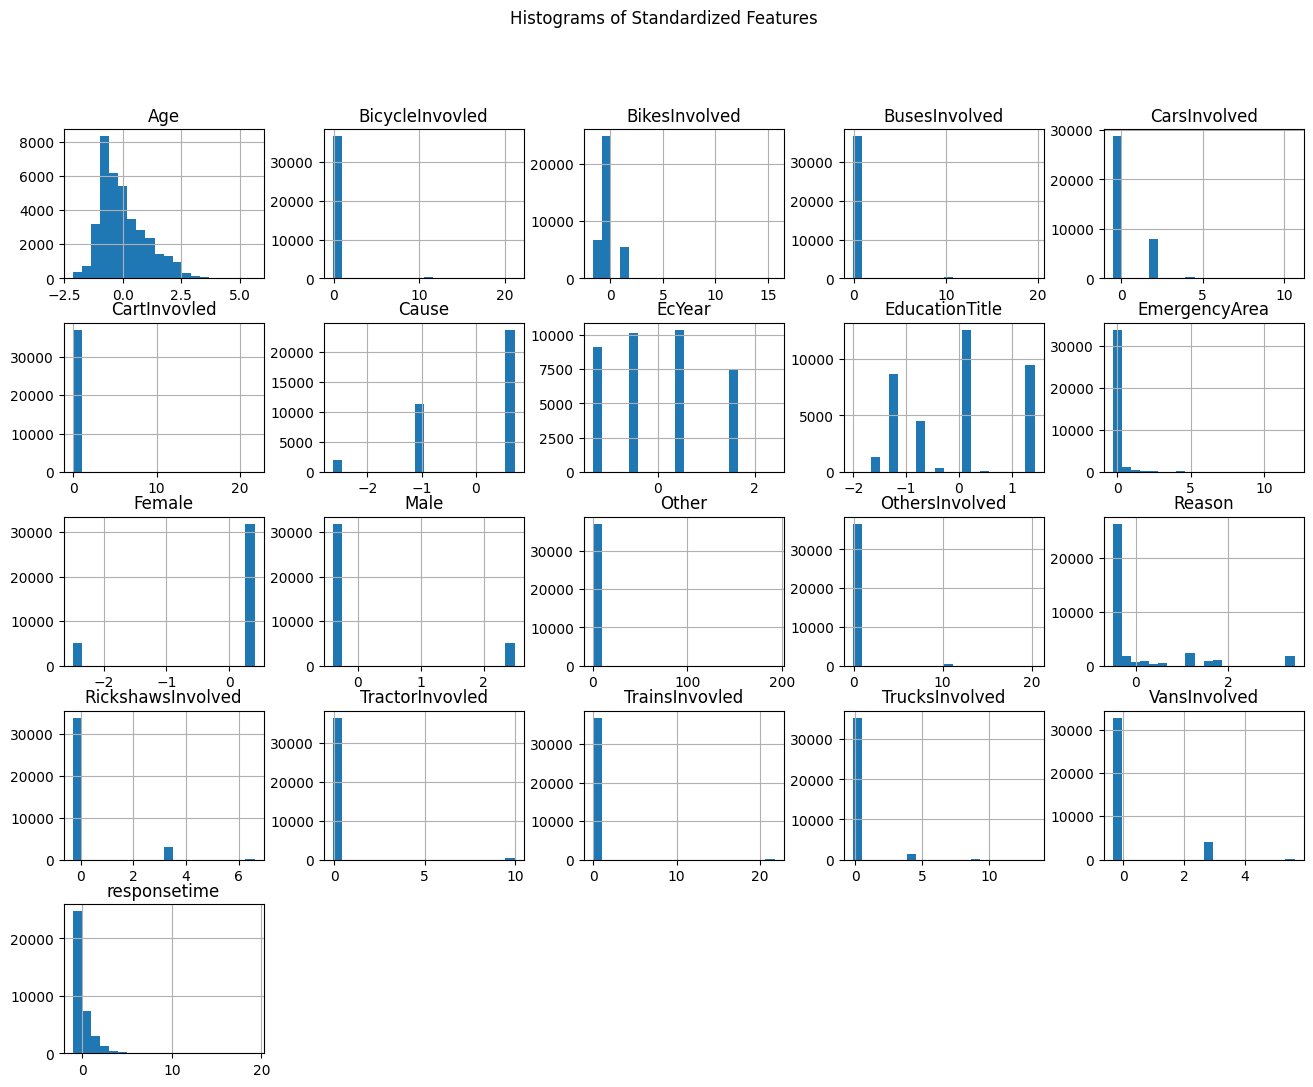

In [ ]:
# Plot histograms for the standardized training set
X_train_scaled.hist(figsize=(16, 12), bins=20)
plt.suptitle("Histograms of Standardized Features")
plt.show()

#Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Step 2: Train the KNN model on the training data
knn.fit(X_train_minmax, Y_train)

# Step 3: Make predictions on the test set
Y_pred = knn.predict(X_test_minmax)

# Step 4: Evaluate the model
print("Classification Report:\n", classification_report(Y_test, Y_pred))
print("Accuracy Score:", accuracy_score(Y_test, Y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.02      0.04       704
           1       0.76      0.91      0.83      6925
           2       0.00      0.00      0.00       178
           3       0.18      0.03      0.06      1349
           4       0.00      0.00      0.00        82

   micro avg       0.74      0.69      0.71      9238
   macro avg       0.23      0.19      0.18      9238
weighted avg       0.61      0.69      0.63      9238
 samples avg       0.69      0.69      0.69      9238

Accuracy Score: 0.6852132496211301


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
